In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

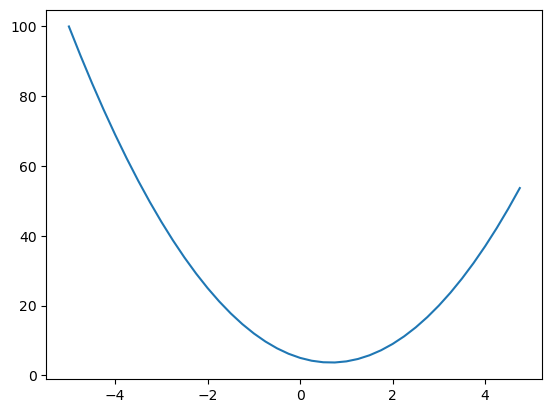

In [4]:
xs = np.arange(-5,5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
# intuition on derivatives 
# if we increase x by a small increment of h, how will the value of y change?
# Will it be larger or smaller, i.e. what is the slope? Positive or negative, and how much?
h = 0.000001 # to be precise, we would need h to converge to 0 (lim h -> 0); if we make the number to small, the result becomes incorrect due to floating point limitations in computer memory
x = 3 # for this function, the minimum is located at 2/3
f(x+h) # this is the new y value
f(x+h) - f(x) # this is the actual response of the function to the slight increase of h
(f(x+h) - f(x)) / h # rise over run --> what is the slope?

print(f"At x={x}, the slope is {(f(x+h) - f(x)) / h}.")

At x=3, the slope is 14.000003002223593.


In [6]:
# let's get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [7]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

#output
d1 = a*b + c
a += h
d2 = a*b + c
print("d1", d1)
print("d2", d2) # will d2 be larger or smaller than d1? --> a will be slightly larger, but b is a negative number --> value of the function will go down
print("Slope", (d2-d1) / h) # therefore, the amount of slope will be a negative number

# makes sense, since the derivate of d with regard to a would be b

d1 4.0
d2 3.999699999999999
Slope -3.000000000010772


In [8]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

#output
d1 = a*b + c
b += h
d2 = a*b + c
print("d1", d1)
print("d2", d2) # will d2 be larger or smaller than d1? --> b will be less negative--> value of the function will go up
print("Slope", (d2-d1) / h) # therefore, the amount of slope will be a positive number

# makes sense, since the derivate of d with regard to b would be a

d1 4.0
d2 4.0002
Slope 2.0000000000042206


In [9]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

#output
d1 = a*b + c
c += h
d2 = a*b + c
print("d1", d1)
print("d2", d2) # will d2 be larger or smaller than d1? --> c is a positive constant --> value of the function will go up
print("Slope", (d2-d1) / h) # since c is a constant that is added at the end, the slope will a 1

# makes sense, since the derivate of d with regard to c would be 1

d1 4.0
d2 4.0001
Slope 0.9999999999976694


In [10]:
# # v1

# class Value:

#     def __init__(self, data, _children=(), _op="", label="") -> None:
#         self.data = data
#         self._prev = set(_children)
#         self._op = _op
#         self.label = label

#     def __repr__(self) -> str:
#         return f"Value=({self.data})"
    
#     def __add__(self, other) -> float:
#         out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type
#         return out
    
#     def __mul__(self, other) -> float:
#         out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type
#         return out
    

# a = Value(2.0, label="a")
# b = Value(-3.0, label="b")
# c = Value(10.0, label="c")
# d = a*b + c
# d
# # (a.__mul__(b)).__add__(c) # this is identical to the line above, only ugly :P

In [11]:
# d._prev

In [12]:
# d._op

In [13]:
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> float:
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type
        return out
    
    def __mul__(self, other) -> float:
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        return out
    

a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label = "e"
d = e + c; d.label = "d"
f = Value(-2.0, label="f")
L = d*f; L.label = "L"
L
# (a.__mul__(b)).__add__(c) # this is identical to the line above, only ugly :P

Value=(-8.0)

In [14]:
L._prev

{Value=(-2.0), Value=(4.0)}

In [15]:
L._op

'*'

In [16]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

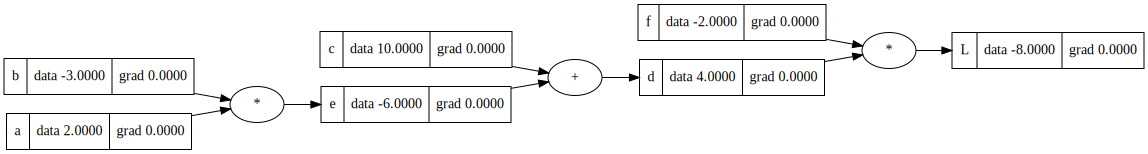

In [17]:
draw_dot(L)

$L = d * f$

$\frac{\delta L}{\delta d} = f$

Proof:

$\lim_{h \to 0}\limits \frac{f(x+h) - f(x)}{h}$ ## default derivation term

CAREFUL: THESE f's are not identical!! f(x) is a function while f is our parameter/value f

$f(x+h) = (d+h) * f$

$f(x) = d*f$

$\frac{(d+h) * f - d*f}{h}$

$\frac{d*f + h*f - d*f}{h}$

$\frac{h*f}{h}$

$f$

In [18]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0

In [19]:
def lol(): # this is just a break-out function for us to experiment in order to not pollute the global space

    h = 0.0001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d*f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    b.data += h
    c = Value(10.0, label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d*f; L.label = "L"
    L2 = L.data

    print((L2-L1) / h)


lol()

-4.000000000008441


Here's the interesting part!
We are looking for the impact that $c$ has on our output $L$.
Therefore, we require the following derivative:

$\frac{\delta L}{\delta c}=?$

What we already know is that the value of $c$ influences the value of $d$ (see graph above).
We also already know the impact that $d$ has on the output $L$.

Therefore, if we can figure out which impact $c$ has on the adjacent value $d$, we can combine this information to determine the impact that $c$ and $d$ together will have on $L$.

Hence, we are looking for the derivate of $d$ with respect to $c$:

$\frac{\delta d}{\delta c}=?$

# Calculating local derivatives / local gradients

$d = c + e$

$\frac{\delta d}{\delta c}=?$

$\frac{\delta d}{\delta e}=?$

Proof:

$\lim_{h \to 0}\limits \frac{f(x+h) - f(x)}{h}$ 

$\frac{(c+h + e) - (c + e)}{h}$

$\frac{(c + h + e - c - e)}{h}$

$\frac{(h)}{h}$

$1.0$

$\frac{\delta d}{\delta c}=1.0$

Via Symmetry rule:

$\frac{\delta d}{\delta e}=1.0$

## A note on local derivatives/gradients vs. global derivatives/gradients

The global derivitave we are interested in is with regard to our output value L.

In a global context, we want to determine how each individual parameters affects/impacts the final output L.

In multi-layered networks, each operation-node, i.e. the +-node in the depiction above, only knows about its connections. Specifically, the +-operation knows that $c$ + $e$ results in $d$. 

Therefore, this node can only determine the derivatives of $\frac{\delta d}{\delta c}$ and $\frac{\delta d}{\delta e}$.

This subset of derivations is therefore referred to as local derivatives, as they are limited in scope to the individual +-node operation and the local influence of values to each other.

In order to correctly determine the global derivative, we first need to calculate each individual local derivative in order to correctly account for connections within the layered structure and how they affect each other and therefore in turn affect the final output $L$.


## The important question

How do we put this information on local derivatives together in order to calculate $\frac{\delta L}{\delta c}$.?

## The Answer

The chain rule in calculus.

# The Chain Rules

Intuition: "if a car (z) travels two times as fast as a bicycle (y), and a bicycle (y) travels four times as fast as a walking man (x), then the car (z) travels $2*4=8$ times as fast as the man"

$\frac{\delta z}{\delta x}=\frac{\delta z}{\delta y} * \frac{\delta y}{\delta x}$

We can take the intermediate rates of change and multiply them together to arrive at the total rate of change.

WANT:
$\frac{\delta L}{\delta c}$

KNOW:
$\frac{\delta L}{\delta d}$
$\frac{\delta d}{\delta c}$

CHAIN RULE:

$\frac{\delta L}{\delta c} = \frac{\delta L}{\delta d} * \frac{\delta d}{\delta c} = -2.0 * 1.0 = -2.0$ 

In [20]:
# according to chain rule
c.grad = -2.0
e.grad = -2.0

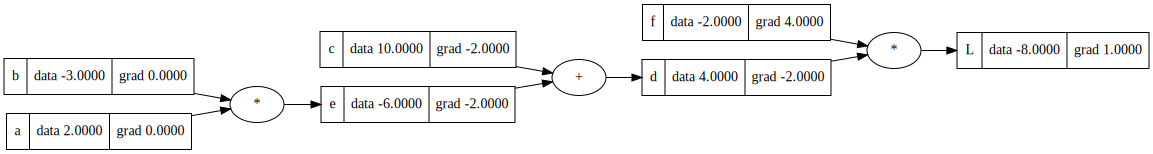

In [21]:
draw_dot(L)

Last step:

WANT:

$\frac{\delta L}{\delta a}$

$\frac{\delta L}{\delta b}$

KNOW:

$\frac{\delta L}{\delta e}$

NEED:

$\frac{\delta e}{\delta a}$

$\frac{\delta e}{\delta b}$

$e=a*b$
$\frac{\delta e}{\delta a}=b$

$\frac{\delta e}{\delta b}=a$


RESULT:
$\frac{\delta L}{\delta a}=\frac{\delta L}{\delta e}*\frac{\delta e}{\delta a}=-2.0*-3.0=6.0$

$\frac{\delta L}{\delta b}=\frac{\delta L}{\delta e}*\frac{\delta e}{\delta b}=-2.0*2.0=-4.0$

In [22]:
a.grad = 6.0
b.grad = -4.0

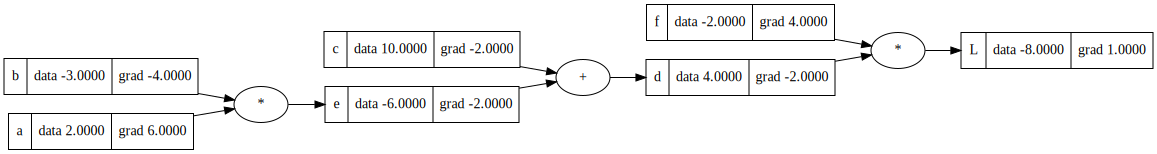

In [23]:
draw_dot(L)

In [24]:
# Let's try to nudge our inputs or leaf nodes in such a way that the output L increases.
# How do we nudge? By applying a small increment to our data in the way of the gradient
# leaf nodes are nodes that we have direct control over (i.e. they are not the result of a calculation)
# If we nudge in the direction of the gradient, we expect a positive impact on L
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

# for our changes to take effect, we need to re-run the Forward Pass!
e = a*b
d = e + c
L = d*f

print(L.data)

# the above code is basically one pass of the optimization
# this gives us immense power since we now know how to influence the outcome

-7.286496


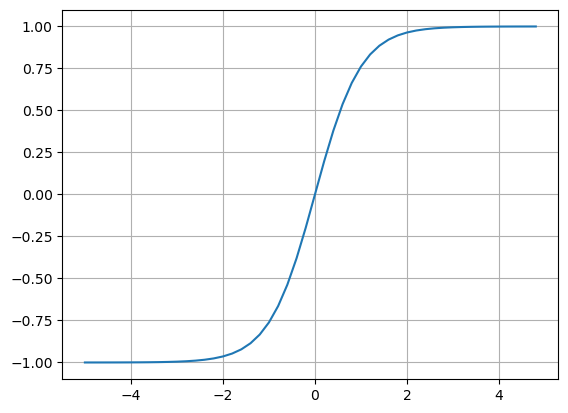

In [25]:
# The Tanh Activation Function ("Squashing Function")

plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

In [26]:
# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label="o"

In [27]:
# Note once again: The derivative of an addition is always 1 --> a +-node backpropagates the gradient without change to its child nodes

In [28]:
o.grad = 1.0

In [29]:
n.grad = 0.5

In [30]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [31]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [32]:
# remember that for a multiply-node, the gradient is calculated according to the chain rule!!
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [33]:
# if I wiggle w2, how is the output changing? --> It is not, since Input x2 is zero. Therefore, the derivative of 0 is the correct answer.

In [34]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

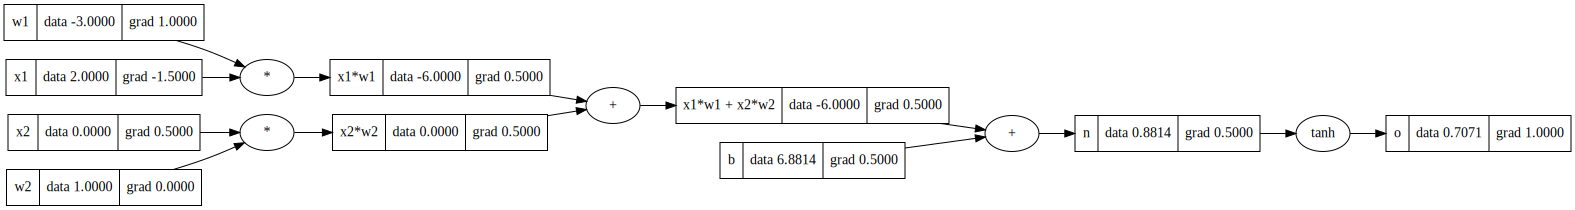

In [35]:
draw_dot(o)

In [36]:
# what these gradients tell us is that if we want to increase our output o, then the weight w2 does not matter. In contrast, the weight of w1 needs to go up in order for the outcome to increase proportionally, as its gradient is 1.0

What is the derivative of tanh?

According to Wikipedia https://en.wikipedia.org/wiki/Hyperbolic_functions#Tanh

$\frac{\delta}{\delta x} \tanh x=1-\tanh(x)^2$

In [37]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2 <=> do/dn = 1 - o**2
1 - o.data**2

0.4999999999999999

# Automated Backpropagation

In [38]:
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> float:
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad = 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad = 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __mul__(self, other) -> float:
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward

        return out

In [39]:
# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label="o"

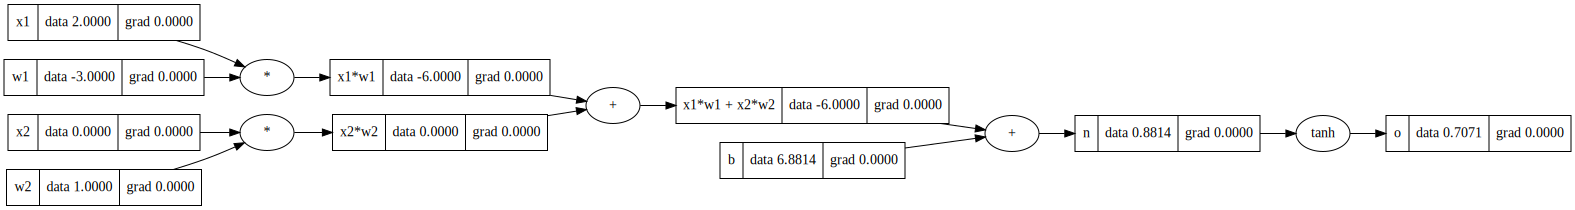

In [40]:
draw_dot(o)

In [41]:
# NOTE: What does the gradient say?
# If I change the data by X, the output of o will change by x * gradient; i.e. if the gradient is 1 and I increase x by 10, the output o will change by 10.
# If the gradient is -0.5 and I increase X by 10, the output will decrease by -5.

In [42]:
# CAREFUL: Since our Value Class is initialized with a gradient of 0.0, we need to set the initial gradient of our output o by hand!!
o.grad = 1.0

In [43]:
o._backward()

In [44]:
n._backward()

In [45]:
b._backward() # we can call this, but nothing will happen as b is a leaf node (it has no child node) and for leaf nodes, the _backward function is initialized as 0.0

In [46]:
x1w1x2w2._backward()

In [47]:
x1w1._backward()

In [48]:
x2w2._backward()

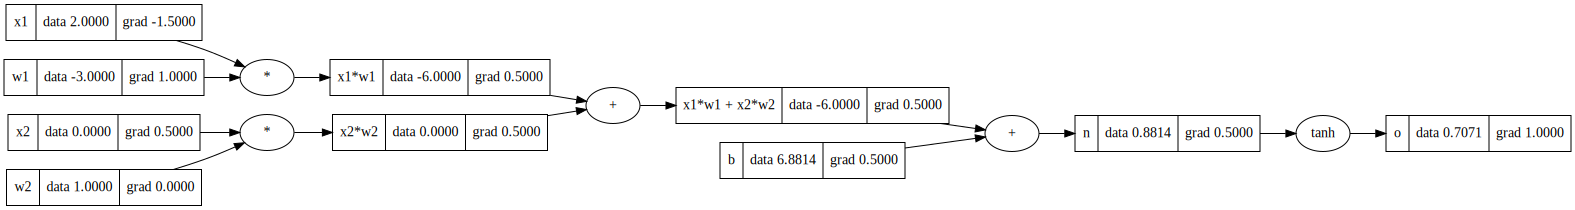

In [49]:
draw_dot(o)

# Topographical Ordering

In [50]:
topo = []
visited = set()

def buildTopo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            buildTopo(child)
        topo.append(v)

buildTopo(o)
topo

[Value=(2.0),
 Value=(-3.0),
 Value=(-6.0),
 Value=(1.0),
 Value=(0.0),
 Value=(0.0),
 Value=(-6.0),
 Value=(6.881373587019543),
 Value=(0.8813735870195432),
 Value=(0.7071067811865476)]

In [51]:
# reset values

# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label="o"

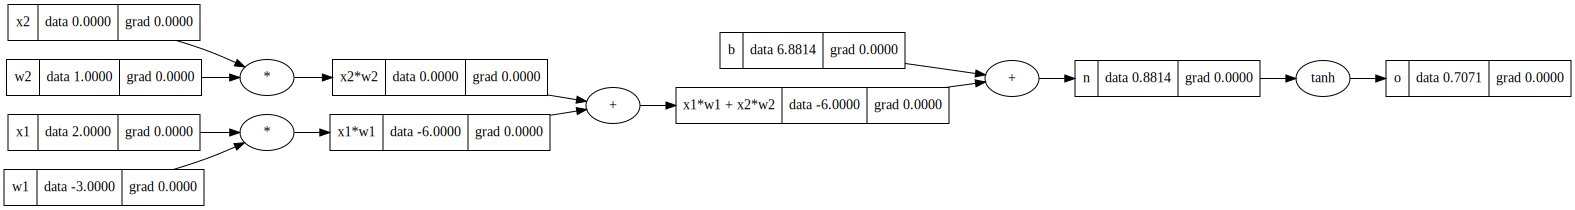

In [52]:
draw_dot(o)

In [53]:
# automatic backpropagation
# we always start by initializing the output gradient to 1.0
o.grad = 1.0

# and then we reversely iterate over all nodes in topological order and call the ._backward() function
def buildTopo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            buildTopo(child)
        topo.append(v)

buildTopo(o)

for node in reversed(topo):
    node._backward()

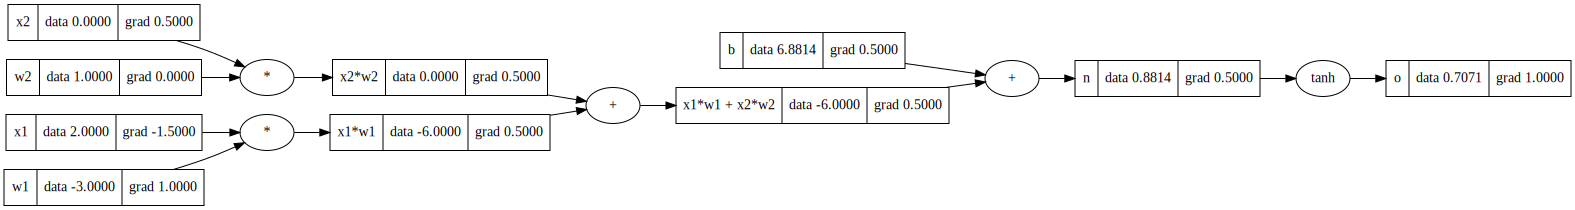

In [54]:
draw_dot(o)

In [55]:
# v3 including automatic backpropagation
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> float:
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad = 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad = 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __mul__(self, other) -> float:
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward

        return out
    
    def backward(self): # initialize backward function to be called on the final output node to iterate backwards through all children
        self.grad = 1.0
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)
        
        buildTopo(self)
        
        for node in reversed(topo):
            node._backward()

In [56]:
# reset values

# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label="o"

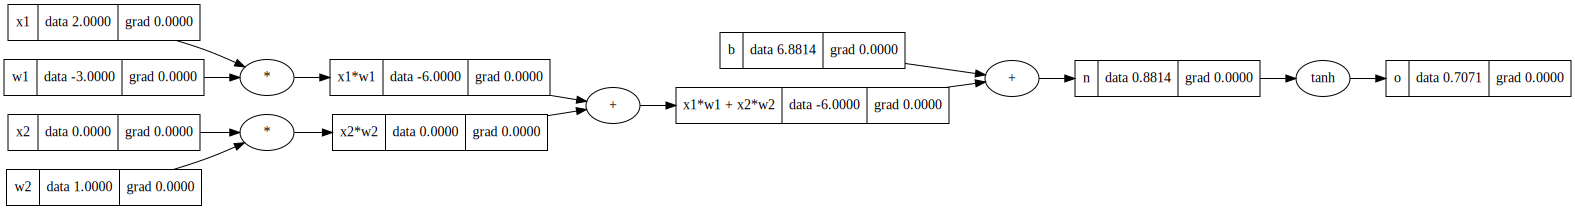

In [57]:
draw_dot(o)

In [58]:
o.backward()

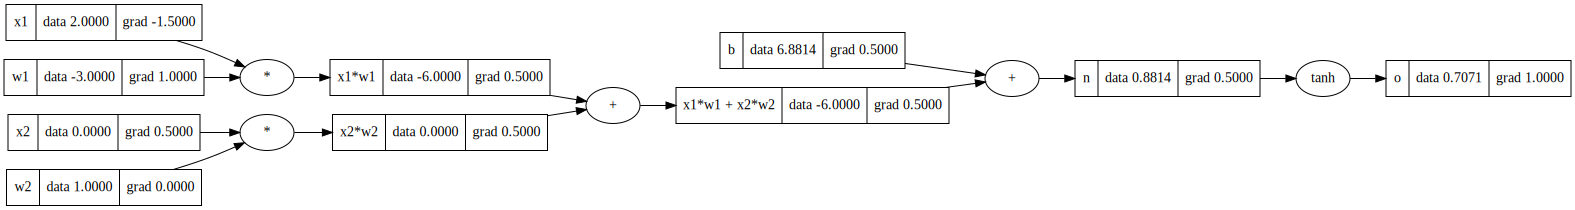

In [59]:
draw_dot(o)

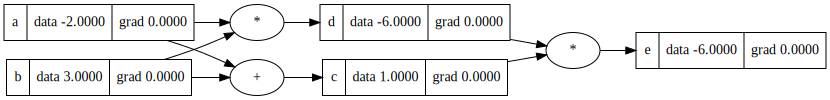

In [60]:
# This looks all nice and dandy, but we have one huge bug that we have not yet surfaced, but that ruins it all
# Key question: What will happen, if we use the same variable multiple times?

a = Value(-2.0, label="a")
b = Value(3.0, label="b")
c = a + b ; c.label = "c"
d = a * b ; d.label="d"
e = c * d ; e.label="e"
draw_dot(e)

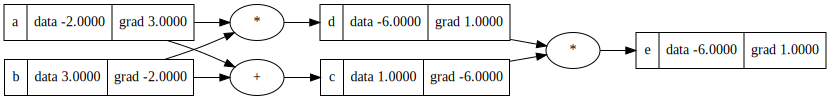

In [61]:
# Let's see what will happen
e.backward()
draw_dot(e)

# Do you see the issue?
# It all looks pretty good for the initial steps.
# e.grad = 1.0 is correct
# de/dd = 1.0 * 1.0 = 1.0 which is correct (Chain Rule)
# Child nodes of d are b and a multiplied, so let's continue with those:
# de/ db = -2 * 1.0 = -2.0 which is correct (Chain Rule)
# de/da = 3 * 1.0 = 3.0 which is correct (Chain Rule)
# --- all child nodes of d finished at arrived at end of line, let's check the remaining branch(es)

# we are still missing node c
# de/dc = -6 * 1.0 = -6.0 which is correct (Chain Rule)
# continue with the child nodes of c: a and b

# de/db = ???? <-- Oh sheet, wait a second; we already calculated this!!! The gradient is -2.0 as derived via node d children
# but what happens, if we calculate this gradient via parent node c?
# de/db = 1.0 * -6.0 = -6.0 != -2.0 !!!!! 
# de/da = 1.0 * -6.0 = -6.0 != 3.0 !!!!!

# That does not add up...

# Multivariable cases of the Chain Rule

In [62]:
# Solution: We have to accumulate the gradients instead of setting them!

In [63]:
# v3 including automatic backpropagation
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> float:
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad += 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __mul__(self, other) -> float:
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward

        return out
    
    def backward(self): # initialize backward function to be called on the final output node to iterate backwards through all children
        self.grad = 1.0
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)
        
        buildTopo(self)
        
        for node in reversed(topo):
            node._backward()

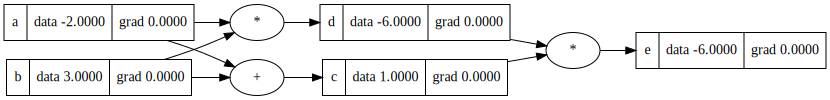

In [64]:
# This looks all nice and dandy, but we have one huge bug that we have not yet surfaced, but that ruins it all
# Key question: What will happen, if we use the same variable multiple times?

a = Value(-2.0, label="a")
b = Value(3.0, label="b")
c = a + b ; c.label = "c"
d = a * b ; d.label="d"
e = c * d ; e.label="e"
draw_dot(e)

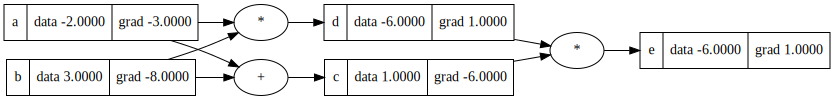

In [65]:
e.backward()
draw_dot(e)

# Yay, this is correct, since we accumulated the gradients! :)

# Enable integer addition to our value object

In [66]:
# v4 including integer addition
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> float:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad += 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __mul__(self, other) -> float:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward

        return out
    
    def backward(self): # initialize backward function to be called on the final output node to iterate backwards through all children
        self.grad = 1.0
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)
        
        buildTopo(self)
        
        for node in reversed(topo):
            node._backward()

In [67]:
a = Value(2.0)
# these work
a + 1
a * 2 

# this does not work
# 2 * a
# since python is trying to call 2.__mul__(a), which does not work
# therefore, we need to set the __rmul__ fallback option

Value=(4.0)

In [68]:
# v5 including __rmul__ (reverse multiply) fallback option
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad += 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __mul__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    

    def __rmul__(self, other) -> Value: # other * self
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward

        return out

    def backward(self): # initialize backward function to be called on the final output node to iterate backwards through all children
        self.grad = 1.0
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)
        
        buildTopo(self)
        
        for node in reversed(topo):
            node._backward()

In [69]:
# now it works
a = Value(2.0)
2 * a

Value=(4.0)

In [70]:
# v6 implement exp
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad += 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __mul__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    

    def __rmul__(self, other) -> Value: # other * self
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), "exp")

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def backward(self): # initialize backward function to be called on the final output node to iterate backwards through all children
        self.grad = 1.0
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)
        
        buildTopo(self)
        
        for node in reversed(topo):
            node._backward()

In [71]:
a = Value(2.0, label="a")
a.exp()

Value=(7.38905609893065)

In [72]:
2.0 / 4.0 # this
2.0 * (1/4.0) # is equal to this
2.0 * (4.0**-1) # is equal to this

0.5

In [73]:
# v7 implement division and power
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad += 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __mul__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other) -> Value:
        assert isinstance(other, (float, int)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f"**{other}")

        def _backward():
            self.grad += other * (self.data**(other - 1)) * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other) -> Value: # other * self
        return self * other
    
    def __truediv__(self, other) -> Value: # self / other
        return self * other**-1 # NOTE: For this to work, we need to implement the power function for our Value object

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), "exp")

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def backward(self): # initialize backward function to be called on the final output node to iterate backwards through all children
        self.grad = 1.0
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)
        
        buildTopo(self)
        
        for node in reversed(topo):
            node._backward()

In [74]:
a = Value(2.0)
b = Value(4.0)
a / b

Value=(0.5)

In [163]:
# v8 implement subtraction
class Value:

    def __init__(self, data, _children=(), _op="", label="") -> None:
        self.data = data
        self.grad = 0 # at initialization, we assume that every value does not effect the output
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value=({self.data})"
    
    def __add__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data + other.data, (self, other), "+") # for every addition, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += 1.0 * out.grad # in an addition, out.grad is simply copied to the input/child nodes
            other.grad += 1.0 * out.grad # this is according to the chain rule
        out._backward = _backward # dont call the function!! this would return None. Only store the function reference, therefore no ()

        return out
    
    def __pow__(self, other) -> Value:
        assert isinstance(other, (float, int)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f"**{other}")

        def _backward():
            self.grad += other * (self.data**(other - 1)) * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other) -> Value:
        other = other if isinstance(other, Value) else Value(other) # if we receive a non-value attribute, convert it to value
        out = Value(self.data * other.data, (self, other), "*") # for every multiplication, feed in the children to the new value as well as the operation type

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __rmul__(self, other) -> Value: # other * self
        return self * other
    
    def __radd__(self, other): # other + self
        return self + other
    
    def __truediv__(self, other) -> Value: # self / other
        return self * other**-1 # NOTE: For this to work, we need to implement the power function for our Value object

    # --- IMPLEMENT SUBTRACTION BY MULTIPLICATION WITH -1; WHY? To use the stuff we already built. :) ---
    def __neg__(self):
        return self * -1 # since we implemented the __mul__ function, we can do this

    def __sub__(self, other):
        return self + (-other) # tada, implemented subtraction with a smart hack :)
    # -------------------------------------------------------
    # def tanh(self):
    #     x = self.data
    #     t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    #     out = Value(t, (self,), "tanh")

    #     def _backward():
    #         self.grad += (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
    #     out._backward = _backward

    #     return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad # Chain rule with the derivative of tanh, where t is our tanh value
        out._backward = _backward
        
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), "exp")

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def backward(self): # initialize backward function to be called on the final output node to iterate backwards through all children
        self.grad = 1.0
        topo = []
        visited = set()
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)
        
        buildTopo(self)
        
        for node in reversed(topo):
            node._backward()

In [150]:
a = Value(2.0)
b = Value(4.0)
a - b

Value=(-2.0)

In [151]:
(1*Value(5.0)).exp()

Value=(148.4131591025766)

0.8813735870195432


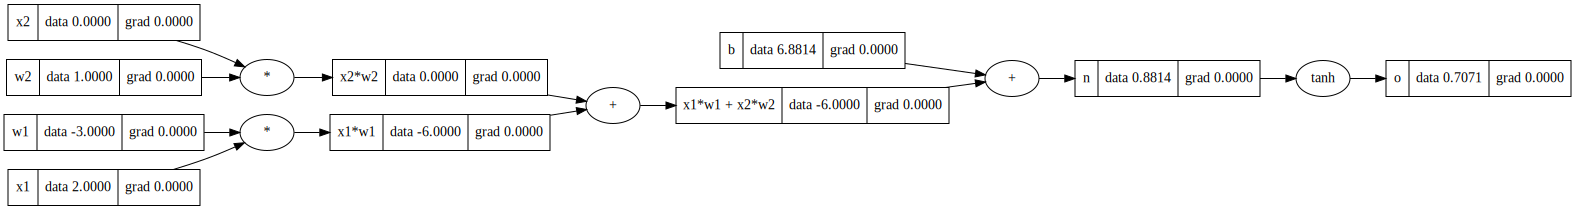

In [152]:
# reset values

# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label="o"
draw_dot(o)

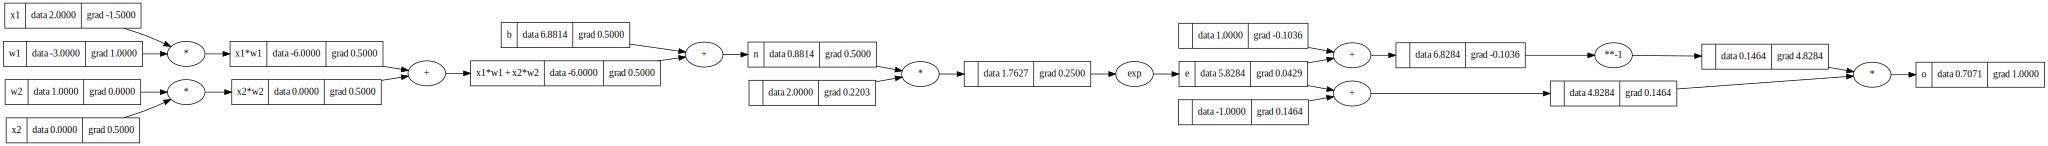

In [153]:
# let's implement tanh using its atomic components (instead of the composite function tanh)

# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"
#---
# o = n.tanh(); o.label="o"
e = (2*n).exp() ; e.label = "e"
o = (e - 1) / (e + 1) ; o.label = "o"
#---
o.backward()
draw_dot(o)
# the output data value should remain identical!!
# as well as the gradients of our leaf nodes / inputs

# Let's see the same implementation in PyTorch

In [154]:
import torch

In [155]:
# NOTE: We use .double() to achieve identical behaviour to Python's default setting; by default, Python uses float64 while torch uses float32
print(torch.Tensor([2.0]).dtype)
print(torch.Tensor([2.0]).double().dtype)

torch.float32
torch.float64


In [156]:
# by default, pyTorch expects that leaf nodes do not require gradients!! Therefore, we need to actively set requires_grad to True
# this is done for efficiency reasons as we usually not require gradients for leaf nodes
x1 = torch.Tensor([2.0])                            ;   x1.requires_grad = True
x2 = torch.Tensor([0.0])                            ;   x2.requires_grad = True
w1 = torch.Tensor([-3.0])                           ;   w1.requires_grad = True
w2 = torch.Tensor([1.0])                            ;   w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double()     ;   b.requires_grad = True
n = x1*w1 + x2*w2 + b

o = torch.tanh(n)

print(o.data.item()) # .item() strips out the tensor and just returns the item
o.backward()

print("---")
print("x2", x2.grad.item())
print("w2", w2.grad.item())
print("x1", x1.grad.item())
print("w1", w1.grad.item())

0.7071066904050358
---
x2 0.5000001192092896
w2 0.0
x1 -1.5000003576278687
w1 1.000000238418579


# Building out a Multi-Layer Perceptron in micrograd

In [157]:
import random

In [158]:
class Neuron:
    '''
    One single Neuron in a Neural Network.
    Each Neuron accepts nin incoming values.
    For each incoming value, one weight is created.
    Each Neuron has a single bias value.

    The Neuron returns the value of its activation function by multiplying each input value times the corresponding weight, calculating the sum and adding the bias.
    '''
    def __init__(self, nin): # nin = number of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] # initialize weights; we need as many weights as the number of inputs
        self.b = Value(random.uniform(-1,1)) # initialize the bias

    def __call__(self, x):
        # w * x + b aka the forward pass
        # act = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b # long version
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # smart version; more efficient since sum does not start at 0.0 but at bias
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]

class Layer:
    '''
    A Layer is a collection of Nodes at a specific stage/depth in a Neural Network.
    The Number of Inputs (nin) determines the number of incoming connections, i.e. the quantity of Nodes in a previous layer. If the previous layer has 3 Neurons, each Neuron within this new Layer will receive three input values.
    The Number of Outputs (nouts) determines the number of Neurons inside the layer, i.e. how many values will be passed along by the layer.
    '''
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs # if only one value in output, i.e. final output layer, return the value
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts # create a total list, i.e. for 3 input nodes and 2 layers of 4 nodes plus 1 output node = [3] + [4, 4, 1] = [3, 4, 4, 1]
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))] # create all layers, i.e. 3 to 4, 4 to 4 and 4 to 1

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x) 
            # this implements the forward pass! Start by inserting the initial input values into the first layer, receive their results, pass these results on to the next layer, receive their results and so on...
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


# input_values = [2.0, 3.0] # these values are passed into the Neuron
# n = Neuron(2) # we create a neuron that accepts two values
# n(input_values) # we evaluate the neuron by passing the input values; the neuron multiplies the input by the weights and adds the bias; then evaluates the activation function


# input_values = [2.0, 3.0]
# l = Layer(len(input_values), 4) # how many incoming synapses to how many outgoing; here 2 values coming in and 4 Neurons that will provide outgoing results
# l(input_values) # each of the outgoing neurons receives the input values, does its calculation by weights and bias and returns each output value

# final:
# input_values = [2.0, 3.0, -1.0]
# mlp = MLP(len(input_values), [4,4,1]) # create a layer that takes two input nodes and returns three output nodes
# mlp(input_values) # this is when the __call__ function is applied

In [159]:
input_values = [2.0, 3.0, -1.0]
mlp = MLP(len(input_values), [4,4,1]) # create a layer that takes two input nodes and returns three output nodes
mlp(input_values) # this is when the __call__ function is applied

1.6557622336872166
1.1561008838046816
-1.3293164360137733
-5.085856300810303
0.18207277164120717
-2.5263735876262006
0.7250490450240314
1.2233965014826058
-1.5907696855302538


Value=(-0.9202672607439719)

1.6557622336872166
1.1561008838046816
-1.3293164360137733
-5.085856300810303
0.18207277164120717
-2.5263735876262006
0.7250490450240314
1.2233965014826058
-1.5907696855302538


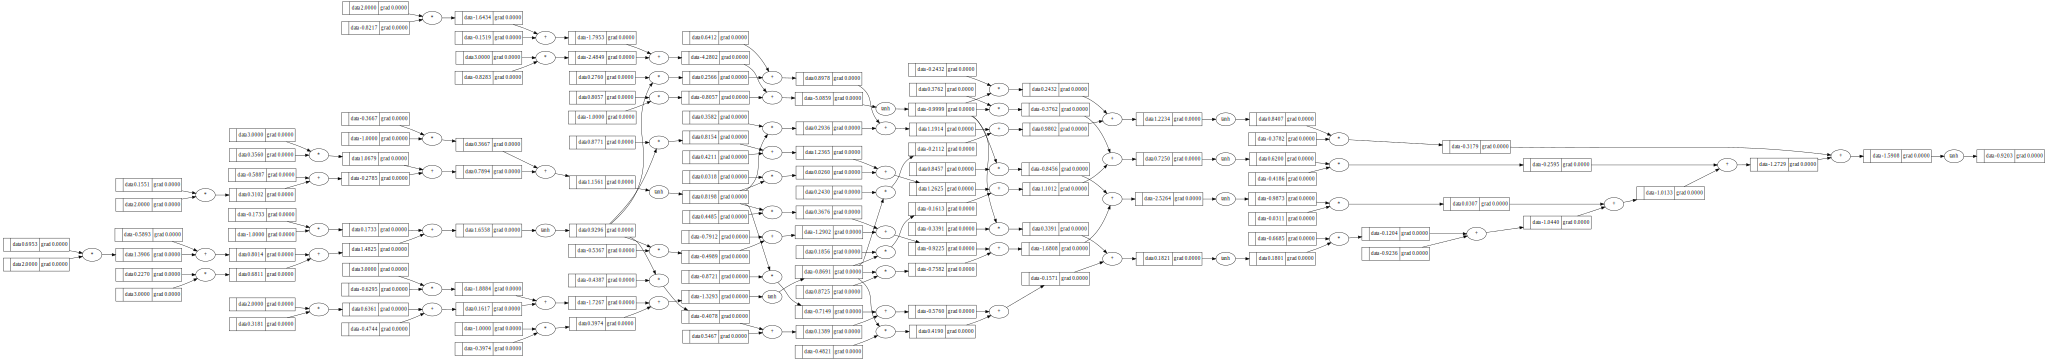

In [160]:
draw_dot(mlp(input_values))

# Let's see this in action - A Simple Binary Classifier

In [161]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [164]:
# NOTE: our loss function is to be minimized
# We require positive values
# Therefore we can either square the differences, increasingly penalizing higher differences in comparison to lower differences
# or we could take the absolute value (mean absolute error) and weighing each difference proportionally in absolute terms
# the lowest value possible is 0, which would mean that each prediction is exactly hitting its ground truth
ypred = [mlp(x) for x in xs]
loss = sum([(ypred-ygt)**2 for ygt, ypred in zip(ys, ypred)]) # mean squared error loss function
loss.label = "L"
loss

Value=(7.445365421806777)

In [165]:
# Here, the magic begins! Let's check of what type loss is
type(loss)

__main__.Value

In [166]:
# And what can we do with a Value? We can call the backward function on it in order to run backpropagation.
loss.backward()

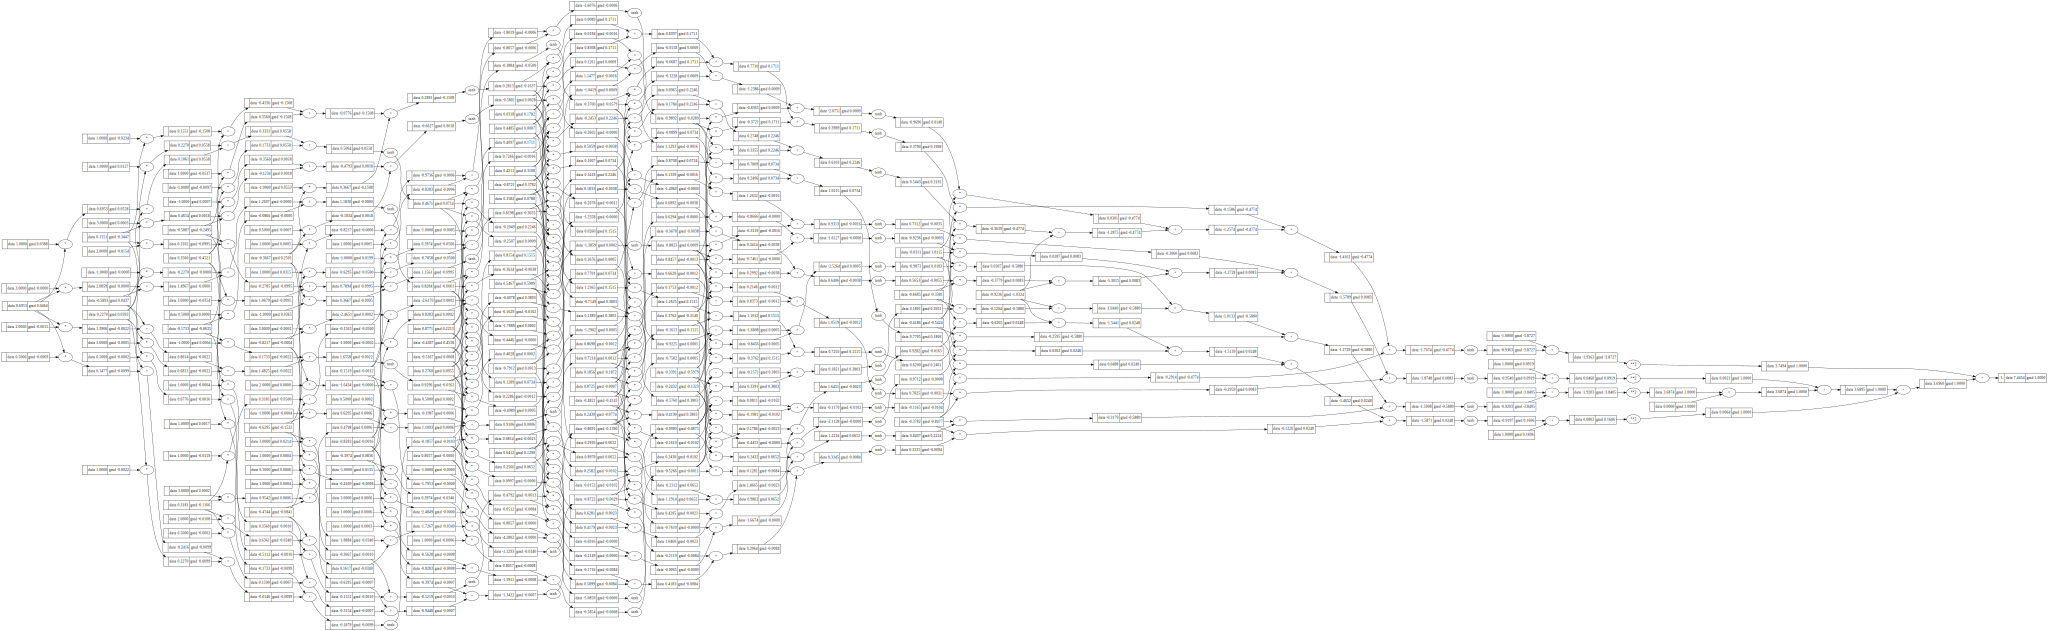

In [167]:
# So what did this do? It calculated all the gradients that impact out outcome, which in this case is the loss function
# This is now a really excessive graph!! It includes all the nodes for all 4 forward passes as well as the loss functon derived from it
draw_dot(loss)

In [168]:
# We can also inspect individual neuron weights
# Let's check out the first neuron in the first layer and its first weight as well as the gradient for this weight
mlp.layers[0].neurons[0].w[0].grad

0.04636474794177065

In [169]:
mlp.layers[0].neurons[0].w[0].data

0.6953153437561985

In [170]:
len(mlp.parameters())

41

In [171]:
x = [2.0, 3.0, -1.0]
mlp = MLP(3, [4,4,1])
mlp(x)

Value=(-0.639696659553567)

In [172]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [173]:
# NOTE: Be careful! The step size is a positive parameter, but we need to negate it. Why?
# The gradient vector points in the direction to INCREASE the Loss Function.
# Therefore, if our goal is to minimize the loss, we need to go in the opposite direction of the gradients.
# Therefore, we multiply the step size by -1.0
learning_rate = 0.01 # don't make this value to large or you might overstep during the descent
for k in range(20):
  
  # forward pass
  ypred = [mlp(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in mlp.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in mlp.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 6.043596723408955
1 2.3411701720031206
2 1.785297074705516
3 1.1657225695270352
4 0.8142661869692268
5 0.5585104771694406
6 0.345341670392097
7 0.21274880585732409
8 0.16934722949575481
9 0.13989823684293742
10 0.11859360555586317
11 0.10257521606058635
12 0.0901481307664283
13 0.08025735966050604
14 0.07221710419196155
15 0.06556447312072723
16 0.059976800466080615
17 0.05522285896025797
18 0.051132939664736234
19 0.047579865371162565


In [174]:
ypred

[Value=(0.9063374692618218),
 Value=(-0.941822802168635),
 Value=(-0.8525919282471858),
 Value=(0.8829809000996428)]